<a href="https://colab.research.google.com/github/horaciosrf/masters_project/blob/main/regression_horacio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão aplicada a dados de saturação de água


## Etapa 1: carregamento de dados e pré-processamento
>  Inicialmente irei usar dois tipos de dados: 
> > * Dados1: é com dados calculados do livro do schon, desses dados, temos os perfis de profundidade (depth),  radioatividade (GR), densidade (RHOB), porosidade neutronica (NPHI), resistividade (RES-DEEP), Vsh (VSH), saturação de água (SW) e porosidade de densidade (DPHI-SS), essas ultimas 3 foram calculadas a partir das anteriores e considerando alguns fatores. Dentre os perfis que utilizaremos, o perfil de SW é calculado diretamente da equação de archi com parametros definidos como *Rw=0,03*, *m=1,96* e *n=2,19*
> > * Dados2: é com os dados experimentais e retirados de um poço em Wyoming. Neste, temos dados de profundidade (DEPTH), porosidade sonica (PHI), resistividade (RES) e saturação de água (SW).


> Começaremos fazendo o treinamento da rede através dos dados1

In [3]:
!pip install welly
!pip install wellpathpy

     |████████████████████████████████| 52 kB 1.0 MB/s 
     |████████████████████████████████| 77 kB 5.7 MB/s 
  Created wheel for welly: filename=welly-0.4.10-py3-none-any.whl size=56037 sha256=9d2efc98dabfe48e38149f315c911aa102ab730e5d6e2ab12528d0dcfc299afe
  Stored in directory: /root/.cache/pip/wheels/e6/cf/9f/7d1cc15079dbecf27bb332a36574907bf3c394371774c4ab49
  Created wheel for striplog: filename=striplog-0.8.8-py3-none-any.whl size=83652 sha256=fd651bd7cd0dea36c627289cce6fb5036ccc0ac7fb6882dca70cb78710c1f2b2
  Stored in directory: /root/.cache/pip/wheels/c9/c1/35/ca8f6fc79aafef514edc14a8f4546efbcf92a943b9e7943810
Successfully built welly striplog


In [4]:
#Bibliotecas que poderão ser usadas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from welly import Well
import lasio

In [6]:
# Vamos ler o arquivo csv direto com o pandas
dados1 = pd.read_csv('/content/dados1.csv',sep="\s+|\t+|\s+\t+|\t+\s+", engine='python')
dados1#,dados2
#dados1=dados1.iloc[21:176,:]
#dados1 = dados1.reset_index(drop = True)

,DEPTH,GR,NPHI,RES-DEEP,SW
0,623.47,40.6,0.051,12.64,0.452596
1,623.62,39.4,0.052,12.73,0.451099
2,623.77,39.6,0.055,12.53,0.454389
3,623.93,41.4,0.058,12.12,0.440224
4,624.08,42.3,0.063,11.85,0.471115
...,...,...,...,...,...
170,649.38,28.6,0.104,0.84,0.959376
171,649.53,26.7,0.102,0.84,1.011385
172,649.68,25.4,0.104,0.84,1.054971
173,649.83,25.2,0.105,0.83,1.168677


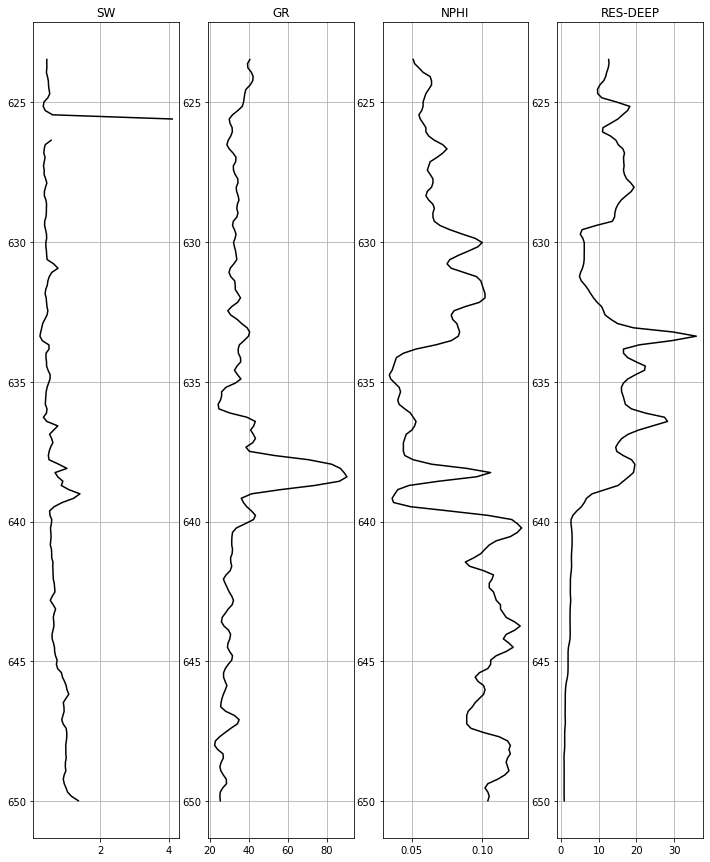

In [7]:
# Plotando para visualizar os perfis
#plt.figure(figsize = (2, 10))
#plt.plot(dados1['SW'],dados1['DEPTH'],color='k')
#ax = plt.gca()


fig, ax = plt.subplots(1,4,figsize=(12,15))
ax[0].plot(dados1['SW'],dados1['DEPTH'],color='k')
#ax[0].set(xlabel = 'RHOB (kg/m³)', ylabel = 'DEPTH (m)')
ax[0].title.set_text('SW')
ax[0].grid()
#ax[0].legend(labels = ['Real','CNN regression', 'BP regression'], loc = "upper right")
#ax[0].set_ylim(well2['Depth'][0], well2['Depth'][len(well2['Depth'])-1])
ax[0].invert_yaxis()

ax[1].plot(dados1['GR'],dados1['DEPTH'],color='k')
#ax[1].set(xlabel = 'RHOB (kg/m³)', ylabel = 'DEPTH (m)')
ax[1].title.set_text('GR')
ax[1].grid()
#ax[1].legend(labels = ['Real','CNN regression', 'BP regression'], loc = "upper right")
#ax[1].set_ylim(well2['Depth'][0], well2['Depth'][len(well2['Depth'])-1])
ax[1].invert_yaxis()

ax[2].plot(dados1['NPHI'],dados1['DEPTH'],color='k')
#ax[2].set(xlabel = 'RHOB (kg/m³)', ylabel = 'DEPTH (m)')
ax[2].title.set_text('NPHI')
ax[2].grid()
#ax[2].legend(labels = ['Real','CNN regression', 'BP regression'], loc = "upper right")
#ax[2].set_ylim(well2['Depth'][0], well2['Depth'][len(well2['Depth'])-1])
ax[2].invert_yaxis()

ax[3].plot(dados1['RES-DEEP'],dados1['DEPTH'],color='k')
#ax[3].set(xlabel = 'RHOB (kg/m³)', ylabel = 'DEPTH (m)')
ax[3].title.set_text('RES-DEEP')
ax[3].grid()
#ax[3].legend(labels = ['Real','CNN regression', 'BP regression'], loc = "upper right")
#ax[3].set_ylim(well2['Depth'][0], well2['Depth'][len(well2['Depth'])-1])
ax[3].invert_yaxis()


In [8]:
# Como temos um problema com os dados ali no começo do perfil de saturação, foi identificado a localização de NaN e vamos retirar esses dados que são prejudiciais
dados1=dados1.iloc[21:176,:]
dados1 = dados1.reset_index(drop = True)

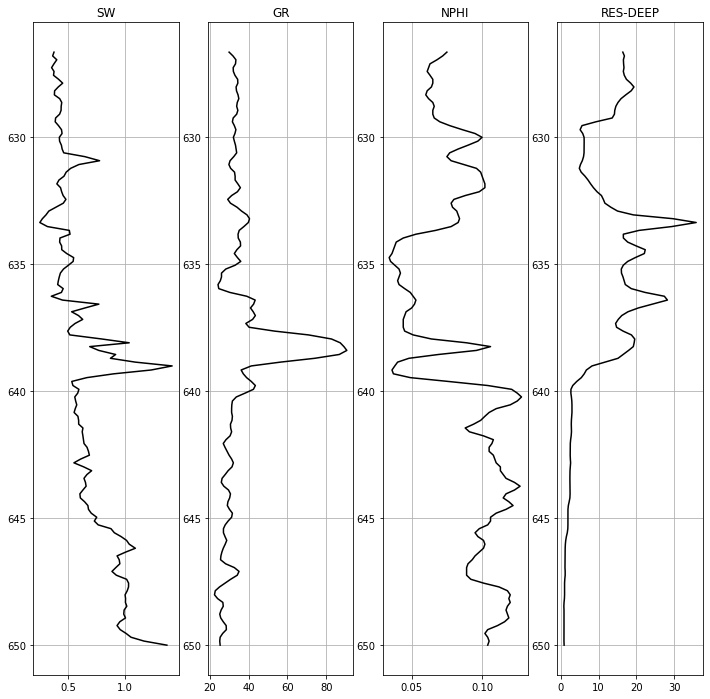

In [9]:
#Plotando para visualizar agora sem os dados corrompidos
fig, ax = plt.subplots(1,4,figsize=(12,12))
ax[0].plot(dados1['SW'],dados1['DEPTH'],color='k')
#ax[0].set(xlabel = 'RHOB (kg/m³)', ylabel = 'DEPTH (m)')
ax[0].title.set_text('SW')
ax[0].grid()
#ax[0].legend(labels = ['Real','CNN regression', 'BP regression'], loc = "upper right")
#ax[0].set_ylim(well2['Depth'][0], well2['Depth'][len(well2['Depth'])-1])
ax[0].invert_yaxis()

ax[1].plot(dados1['GR'],dados1['DEPTH'],color='k')
#ax[1].set(xlabel = 'RHOB (kg/m³)', ylabel = 'DEPTH (m)')
ax[1].title.set_text('GR')
ax[1].grid()
#ax[1].legend(labels = ['Real','CNN regression', 'BP regression'], loc = "upper right")
#ax[1].set_ylim(well2['Depth'][0], well2['Depth'][len(well2['Depth'])-1])
ax[1].invert_yaxis()

ax[2].plot(dados1['NPHI'],dados1['DEPTH'],color='k')
#ax[2].set(xlabel = 'RHOB (kg/m³)', ylabel = 'DEPTH (m)')
ax[2].title.set_text('NPHI')
ax[2].grid()
#ax[2].legend(labels = ['Real','CNN regression', 'BP regression'], loc = "upper right")
#ax[2].set_ylim(well2['Depth'][0], well2['Depth'][len(well2['Depth'])-1])
ax[2].invert_yaxis()

ax[3].plot(dados1['RES-DEEP'],dados1['DEPTH'],color='k')
#ax[3].set(xlabel = 'RHOB (kg/m³)', ylabel = 'DEPTH (m)')
ax[3].title.set_text('RES-DEEP')
ax[3].grid()
#ax[3].legend(labels = ['Real','CNN regression', 'BP regression'], loc = "upper right")
#ax[3].set_ylim(well2['Depth'][0], well2['Depth'][len(well2['Depth'])-1])
ax[3].invert_yaxis()

## Etapa 2: Criando modelo de regressão normal
> * Essa é a primeira tentativa de uso de regressão pelo tensorflow, sem muito processamento dos dados, feito somente para teste inicial.

In [10]:
# Importando tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation

In [11]:
dados1.columns

Index(['DEPTH', 'GR', 'NPHI', 'RES-DEEP', 'SW'], dtype='object')

In [12]:
# Gerando os dados de entrada
x1 = dados1[['NPHI','RES-DEEP']]
y1 = dados1[['SW']]

# Como a resistividade está com valores muito acima da porosidade, temos que normalizar
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x1[['NPHI','RES-DEEP']] = scaler.fit_transform(x1[['NPHI','RES-DEEP']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3076: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3041: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [13]:
# Utilizando a função train_test_split (sklearn) para dividir de forma aleatória os elementos dos
# dados 
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 42)

In [14]:
# Gerando o modelo
tf.random.set_seed(42)

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')

model1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(75, activation='relu'),
  tf.keras.layers.Dense(1, activation='linear')                        
])

# Compiling the model
model1.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics = ['mae'])

# Fitting the model

history1 = model1.fit(x1_train, y1_train,
                      epochs=1000, 
                      validation_data=(x1_test, y1_test), 
                      callbacks = [callback],
                      validation_split = 0.5)

Epoch 1/1000
2/2 [==============================] - 1s 201ms/step - loss: 0.5172 - mae: 0.5172 - val_loss: 0.2039 - val_mae: 0.2039
Epoch 2/1000
2/2 [==============================] - 0s 29ms/step - loss: 0.2697 - mae: 0.2697 - val_loss: 0.3026 - val_mae: 0.3026
Epoch 3/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.2850 - mae: 0.2850 - val_loss: 0.1943 - val_mae: 0.1943
Epoch 4/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.1927 - mae: 0.1927 - val_loss: 0.2102 - val_mae: 0.2102
Epoch 5/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.2382 - mae: 0.2382 - val_loss: 0.2260 - val_mae: 0.2260
Epoch 6/1000
2/2 [==============================] - 0s 30ms/step - loss: 0.2290 - mae: 0.2290 - val_loss: 0.1795 - val_mae: 0.1795
Epoch 7/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.1943 - mae: 0.1943 - val_loss: 0.1823 - val_mae: 0.1823
Epoch 8/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.1962 - 

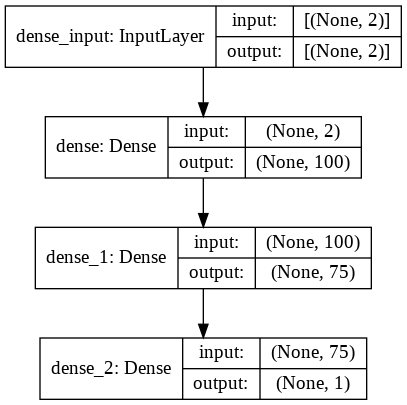

In [15]:
from tensorflow.keras.utils import plot_model
plot_model(model1, show_shapes=True)

In [16]:
# Avaliando o modelo
model1.evaluate(x1_test, y1_test)

1/1 [==============================] - 0s 19ms/step - loss: 0.0910 - mae: 0.0910


[0.09095074981451035, 0.09095074981451035]

Text(0, 0.5, 'Loss')

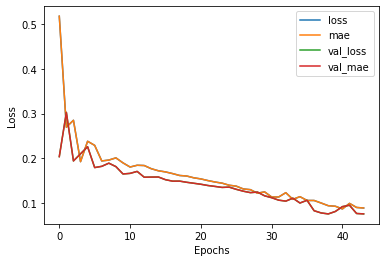

In [17]:
pd.DataFrame(history1.history).plot()
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [18]:
pred = model1.predict(x1)

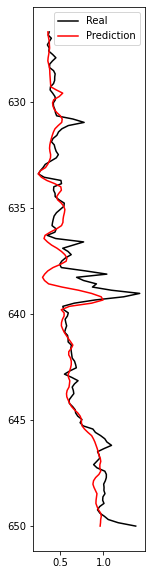

In [19]:
# Figura para comparar o dado real com o calculado
plt.figure(figsize = (2, 10))

plt.plot(dados1['SW'], dados1['DEPTH'], color = 'k')
plt.plot(pred, dados1['DEPTH'], color = 'red')

plt.legend(labels = [ 'Real','Prediction'])
#plt.ylim(well1['Depth'][0],well1['Depth'][len(well1['Depth'])-1])
ax = plt.gca()
ax.invert_yaxis()

## Etapa 3: Aplicando o modelo em dados de teste
> * Para testar o dado treinado na rede de regressão, vamos usar os dados2, que são dados experimentais tirados em laboratório

In [21]:
# Inicialmente vamos ler os dados
dados2 = pd.read_csv('/content/dados2.csv',sep="\s+|\t+|\s+\t+|\t+\s+", engine='python')
dados2

,DEPTH,PHI,RES,SW
0,5456.1,0.0011,860.68518,6.1
1,5456.3,0.0008,677.43329,8.9
2,5458.5,0.0176,276.09280,10.6
3,5462.8,0.0091,439.26807,10.2
4,5465.4,0.0868,42.47038,23.2
5,5514.6,0.1521,77.73200,48.7
6,5517.8,0.1955,29.97581,9.0
7,5518.7,0.1674,33.86389,33.6
8,5519.2,0.1571,34.34479,6.8
9,5519.3,0.1483,75.46670,7.5


In [22]:
x2 = dados2[['PHI','RES']]
y2 = dados2[['SW']] / 100

x2[['RES']] = scaler.fit_transform(x2[['RES']])
x2[['PHI']] = scaler.fit_transform(x2[['PHI']])
#y2[['SW']] = scaler.fit_transform(y2[['SW']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3076: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3041: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [23]:
pred2 = model1.predict(x2)
pred2, y2

(array([[0.33557144],
        [0.4140366 ],
        [0.7148198 ],
        [0.5141179 ],
        [0.9738045 ],
        [0.5658053 ],
        [0.8890147 ],
        [0.9045638 ],
        [0.9184505 ],
        [0.5898769 ],
        [0.92440665],
        [0.873261  ]], dtype=float32),        SW
 0   0.061
 1   0.089
 2   0.106
 3   0.102
 4   0.232
 5   0.487
 6   0.090
 7   0.336
 8   0.068
 9   0.075
 10  0.445
 11  0.246)

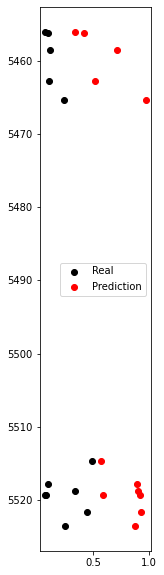

In [24]:
plt.figure(figsize = (2, 10))

plt.scatter(y2, dados2['DEPTH'], color = 'k')
plt.scatter(pred2, dados2['DEPTH'], color = 'red')

plt.legend(labels = [ 'Real','Prediction'])
#plt.ylim(well1['Depth'][0],well1['Depth'][len(well1['Depth'])-1])
ax = plt.gca()
ax.invert_yaxis()

> * Vamos aplicar o modelo no dado normal do poço para comparar com os valores tanto do dado experimental quanto da calculada a partir do experimental. Para isso, vamos ler o arquivo ``pex_ait_hrlt_bhc48X_28ondepth.las``, que contém os perfis de resisitividade e porosidade

In [55]:
# Usamos diretamente do welly uma função para ler o arquivo .las
well1_welly = Well.from_las('/content/pex_ait_hrlt_bhc48X_28ondepth.las', index='ft')


In [56]:
# Vamos visualizar os perfis que temos
well1_welly.data

{'AHMF': Curve([    nan,  0.9498,  0.9498, ..., -0.005 , -0.005 ,     nan]),
 'AHT10': Curve([   nan, 7.1886, 7.1886, ..., 0.0667, 0.0667,    nan]),
 'AHT20': Curve([   nan, 8.0326, 8.0326, ..., 0.0667, 0.0667,    nan]),
 'AHT30': Curve([    nan,  8.3806,  8.3806, ..., 81.4918, 60.5252,     nan]),
 'AHT60': Curve([     nan,   8.7472,   8.7472, ...,  98.9917, 204.961 ,      nan]),
 'AHT90': Curve([    nan,  9.0461,  9.0461, ..., 16.0163, 18.6296,     nan]),
 'AHTCO60': Curve([     nan, 114.3224, 114.3224, ...,  10.1019,   4.879 ,      nan]),
 'AHTCO90': Curve([     nan, 110.5447, 110.5447, ...,  62.4364,  53.678 ,      nan]),
 'CDF': Curve([     nan, 681.138 , 681.138 , ...,  -3.9105,  14.22  ,      nan]),
 'CS': Curve([      nan, 1654.6826, 1654.6826, ..., 2170.647 , 2113.9165,
              nan]),
 'DPHZ': Curve([          nan, -1.038000e-01, -1.038000e-01, ...,  6.072121e+02,
         6.072121e+02,           nan]),
 'DT': Curve([     nan, 114.066 , 114.066 , ...,  47.7771,  47.7771, 

In [57]:
# Aplicando despike
well1_welly.data['SPHI_DESPIKED'] = well1_welly.data['SPHI'].despike(window_length = 70, z =2)
well1_welly.data['RT_DESPIKED'] = well1_welly.data['RT_HRLT'].despike(window_length=70, z=2)

In [58]:
# Vamos converter para pandas apenas os perfis que queremos, que são o SPHI e o RT_HRLT.
# Usamos também o reset_index(drop = False) para zerar os indíces dos perfis, gerando a coluna de depth.
well1 = well1_welly.df(['SPHI', 'RT_HRLT','SPHI_DESPIKED','RT_DESPIKED'])
well1 = well1.reset_index(drop = False)
well1

,Depth,SPHI,RT_HRLT,SPHI_DESPIKED,RT_DESPIKED
0,452.7,NaN,0.11538,NaN,0.11538
1,453.2,0.4395,0.11538,0.4395,0.11538
2,453.7,0.4395,0.11538,0.4395,0.11538
3,454.2,0.4395,0.11538,0.4395,0.11538
4,454.7,0.4395,0.11538,0.4395,0.11538
...,...,...,...,...,...
10628,5766.7,-0.0563,54.00268,-0.0563,54.00268
10629,5767.2,-0.0563,54.00320,-0.0563,54.00320
10630,5767.7,-0.0563,54.00693,-0.0563,54.00693
10631,5768.2,-0.0563,NaN,-0.0563,NaN


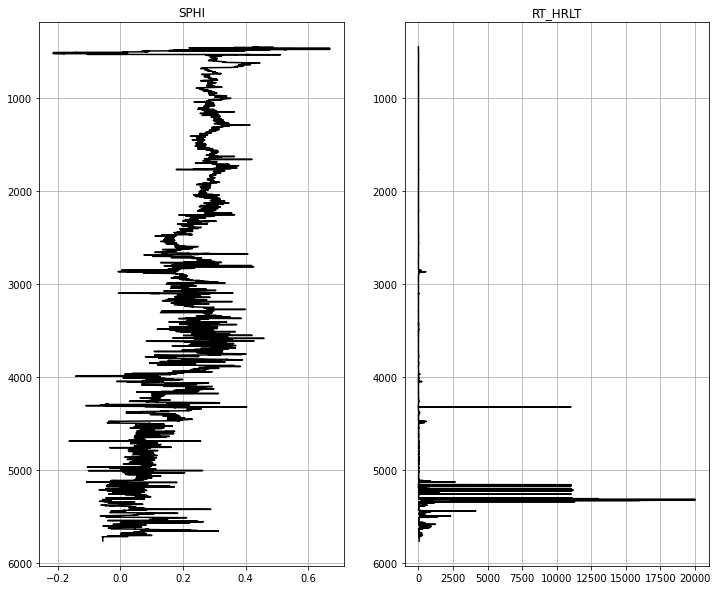

In [53]:
#Plotando para visualizar os dois perfis
fig, ax = plt.subplots(1,2,figsize=(12,10))
ax[0].plot(well1['SPHI_DESPIKED'],well1['Depth'],color='k')
#ax[0].set(xlabel = 'RHOB (kg/m³)', ylabel = 'DEPTH (m)')
ax[0].title.set_text('SPHI')
ax[0].grid()
#ax[0].legend(labels = ['Real','CNN regression', 'BP regression'], loc = "upper right")
#ax[0].set_ylim(well2['Depth'][0], well2['Depth'][len(well2['Depth'])-1])
ax[0].invert_yaxis()

ax[1].plot(well1['RT_DESPIKED'],well1['Depth'],color='k')
#ax[1].set(xlabel = 'RHOB (kg/m³)', ylabel = 'DEPTH (m)')
ax[1].title.set_text('RT_HRLT')
ax[1].grid()
#ax[1].legend(labels = ['Real','CNN regression', 'BP regression'], loc = "upper right")
#ax[1].set_ylim(well2['Depth'][0], well2['Depth'][len(well2['Depth'])-1])
ax[1].invert_yaxis()

In [62]:
# O poço é grande, mas só utilizaremos uma pequena parte dele, que é a proximidade do reservatório onde está localizado os dados experimentais.
# Portanto, vamos fazer o slice do dado numa profundidade aproximada de onde foram tirados os dados experimentais.
ia = well1.index[well1['Depth'] == 5400.2]
ib = well1.index[well1['Depth'] == 5550.7]
#ia,ib
well1 = well1.iloc[9895:10196,:]
well1 = well1.reset_index(drop = True)
well1

,Depth,SPHI,RT_HRLT,SPHI_DESPIKED,RT_DESPIKED
0,5400.2,0.0267,37.11008,0.0267,37.11008
1,5400.7,0.0406,32.99814,0.0406,32.99814
2,5401.2,0.0465,30.09413,0.0465,30.09413
3,5401.7,0.0482,30.47871,0.0482,30.47871
4,5402.2,0.0502,31.52243,0.0502,31.52243
...,...,...,...,...,...
296,5548.2,0.1157,36.27018,0.1157,36.27018
297,5548.7,0.1171,35.11890,0.1171,35.11890
298,5549.2,0.1262,34.40559,0.1262,34.40559
299,5549.7,0.1223,37.27995,0.1223,37.27995


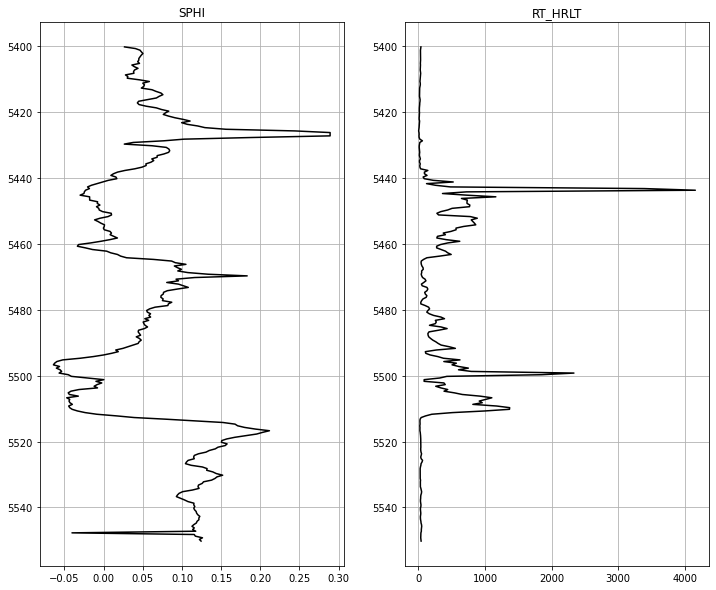

In [63]:
#Plotando para visualizar os dois perfis depois do slice
fig, ax = plt.subplots(1,2,figsize=(12,10))
ax[0].plot(well1['SPHI_DESPIKED'],well1['Depth'],color='k')
#ax[0].set(xlabel = 'RHOB (kg/m³)', ylabel = 'DEPTH (m)')
ax[0].title.set_text('SPHI')
ax[0].grid()
#ax[0].legend(labels = ['Real','CNN regression', 'BP regression'], loc = "upper right")
#ax[0].set_ylim(well2['Depth'][0], well2['Depth'][len(well2['Depth'])-1])
ax[0].invert_yaxis()

ax[1].plot(well1['RT_DESPIKED'],well1['Depth'],color='k')
#ax[1].set(xlabel = 'RHOB (kg/m³)', ylabel = 'DEPTH (m)')
ax[1].title.set_text('RT_HRLT')
ax[1].grid()
#ax[1].legend(labels = ['Real','CNN regression', 'BP regression'], loc = "upper right")
#ax[1].set_ylim(well2['Depth'][0], well2['Depth'][len(well2['Depth'])-1])
ax[1].invert_yaxis()

In [65]:
x3 = well1[['SPHI_DESPIKED','RT_DESPIKED']]
#y3 = dados2[['SW']] / 100

x3[['RT_DESPIKED']] = scaler.fit_transform(x3[['RT_DESPIKED']])
x3[['SPHI_DESPIKED']] = scaler.fit_transform(x3[['SPHI_DESPIKED']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3076: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3041: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [66]:
pred3 = model1.predict(x3)
pred3

array([[1.1615224 ],
       [1.1321952 ],
       [1.1215903 ],
       [1.1165918 ],
       [1.1093484 ],
       [1.1144556 ],
       [1.1192101 ],
       [1.1239557 ],
       [1.123119  ],
       [1.1300691 ],
       [1.1256713 ],
       [1.1483768 ],
       [1.1423314 ],
       [1.13275   ],
       [1.145263  ],
       [1.1422305 ],
       [1.1368124 ],
       [1.1684377 ],
       [1.1650918 ],
       [1.1714875 ],
       [1.1349111 ],
       [1.1014099 ],
       [1.1172118 ],
       [1.1101875 ],
       [1.1220652 ],
       [1.1358639 ],
       [1.1002414 ],
       [1.084921  ],
       [1.0755838 ],
       [1.0769333 ],
       [1.0802172 ],
       [1.0789315 ],
       [1.1052169 ],
       [1.136558  ],
       [1.1468929 ],
       [1.1427357 ],
       [1.1243013 ],
       [1.090784  ],
       [1.0817585 ],
       [1.0715957 ],
       [1.0721972 ],
       [1.0791733 ],
       [1.072876  ],
       [1.0682046 ],
       [1.056958  ],
       [1.0376611 ],
       [1.0527991 ],
       [1.048

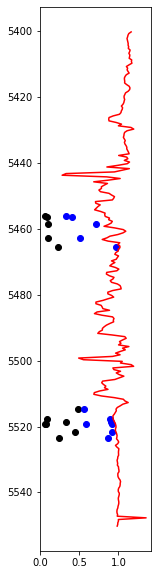

In [68]:
plt.figure(figsize = (2, 10))

plt.scatter(y2, dados2['DEPTH'], color = 'k')
plt.plot(pred3, well1['Depth'], color = 'red')
plt.scatter(pred2, dados2['DEPTH'], color = 'blue')

#plt.legend(labels = [ 'Real','Prediction'])
#plt.ylim(well1['Depth'][0],well1['Depth'][len(well1['Depth'])-1])
ax = plt.gca()
ax.invert_yaxis()